## Problem: Find a factor to make delta synapses and alpha synapses equivalent

### Parameter for excitatory neuron as post-synaptic neuron 

In [34]:
from brian2 import *

# Parameters
R            = 50  *Mohm          # membrane resitance [MOhm]
tau_m        = 20 * ms            # excitatory neuron membrane time constant [ms]
c_m          = tau_m/R            # Capacitance excitatory neurons [nF]
tauRef       = 2.0 *ms            # refractory time [ms]
v_rest       = -70.0 *mV          # resting potential [mV]
Vt           = -50.0 *mV          # threshold [mV]
Vr           = -60.0 *mV          # reset [mV]  
tau_syn_e    = 0.1 *ms            # time constant for synapse [ms] 

# Neuron model with alpha function for synpases
eqs_alpha = '''
    dv/dt = (v_rest-v)/tau_m + R*(ie + i_inj)/tau_m  : volt (unless refractory)
    
    die/dt = (2.7182818284590451*ye-ie)/tau_syn_e : ampere
    dye/dt = -ye/tau_syn_e                        : ampere
    i_inj : ampere
    '''
# Neuron model without alpha function for synapses
eqs = '''
    dv/dt = (v_rest-v)/tau_m + (ie + i_inj)/c_m  : volt (unless refractory)
   i_inj : ampere
    '''

In [35]:
# array to store current and psp
arrayData=np.zeros((2,11))
# For over synaptic currents
for k in range(0,11):

    # Create a Spike generator that spikes at 200ms
    indices = array([0])
    times = array([200])*ms
    G = SpikeGeneratorGroup(1, indices, times)    
    
    # Create a Neuron Group with only one neuron
    P = NeuronGroup(1, eqs_alpha, threshold='v>Vt', reset='v = Vr', refractory=2*ms, method='euler')
    P.v = v_rest        # initial condition for membrane potential
    P.ye = 0*mA         # initial condition for ye (auxiliary variable for alpha function)
    P[0].i_inj=0.*nA    # injected or external current
    
    # Synapse between Spike Generator and Neuron
    Ce = Synapses(G, P, on_pre='ye += we')
    Ce.connect(j='i')
    we = (k/10)*nA #synaptic current
    
    # Spike Monitor to store 
    M = StateMonitor(P, 'v', record=True)

    # Run simulation
    run( 0.5* second)
    
    # store synpatic current
    arrayData[0,k]=(k/10)
    # store post synaptic potential caused by synpase
    arrayData[1,k]=(max(M.v[0])/mV-min(M.v[0])/mV)
    

Text(0, 0.5, 'Increment in membrane potential (mV)')

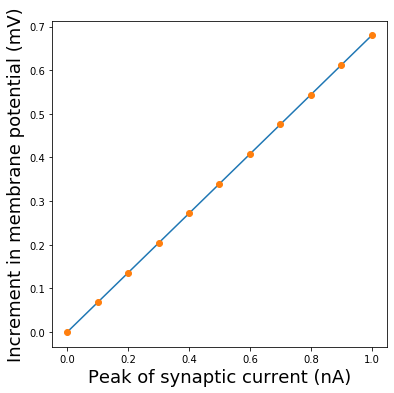

In [36]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(arrayData[0,:].reshape(-1,1), arrayData[1,:])

# Relation between increment in membrane potential and synaptic current
rcParams['figure.figsize'] = 6, 6
plot(arrayData[0,:],arrayData[0,:]*regr.coef_)
plot(arrayData[0,:],arrayData[1,:],'o')
xlabel('Peak of synaptic current (nA)',fontsize=18)
ylabel('Increment in membrane potential (mV)',fontsize=18)

#### Parameter

In [37]:
factorE =regr.coef_ 
factorE

array([0.67957046])

### Parameter for inhibitory neuron as post-synaptic neuron 

In [38]:
# Parameters
R            = 50  *Mohm          # membrane resitance [MOhm]
tau_m        = 10 * ms            # inhibitory neuron membrane time constant [ms]
c_m          = tau_m/R            # Capacitance inhibitory neurons [nF]
tauRef       = 2.0 *ms            # refractory time [ms]
v_rest       = -70.0 *mV          # resting potential [mV]
Vt           = -50.0 *mV          # threshold [mV]
Vr           = -60.0 *mV          # reset [mV]  
tau_syn_e    = 0.1 *ms            # time constant for synapse [ms] 

# Neuron model with alpha function for synpases
eqs_alpha = '''
    dv/dt = (v_rest-v)/tau_m + R*(ie + i_inj)/tau_m  : volt (unless refractory)
    
    die/dt = (2.7182818284590451*ye-ie)/tau_syn_e : ampere
    dye/dt = -ye/tau_syn_e                        : ampere
    i_inj : ampere
    '''
# Neuron model without alpha function for synapses
eqs = '''
    dv/dt = (v_rest-v)/tau_m + (ie + i_inj)/c_m  : volt (unless refractory)
   i_inj : ampere
    '''

In [39]:
# array to store current and psp
arrayData=np.zeros((2,11))
# For over synaptic currents
for k in range(0,11):

    # Create a Spike generator that spikes at 200ms
    indices = array([0])
    times = array([200])*ms
    G = SpikeGeneratorGroup(1, indices, times)    
    
    # Create a Neuron Group with only one neuron
    P = NeuronGroup(1, eqs_alpha, threshold='v>Vt', reset='v = Vr', refractory=2*ms, method='euler')
    P.v = v_rest        # initial condition for membrane potential
    P.ye = 0*mA         # initial condition for ye (auxiliary variable for alpha function)
    P[0].i_inj=0.*nA    # injected or external current
    
    # Synapse between Spike Generator and Neuron
    Ce = Synapses(G, P, on_pre='ye += we')
    Ce.connect(j='i')
    we = (k/10)*nA #synaptic current
    
    # Spike Monitor to store 
    M = StateMonitor(P, 'v', record=True)

    # Run simulation
    run( 0.5* second)
    
    # store synpatic current
    arrayData[0,k]=(k/10)
    # store post synaptic potential caused by synpase
    arrayData[1,k]=(max(M.v[0])/mV-min(M.v[0])/mV)
    

Text(0, 0.5, 'Increment in membrane potential (mV)')

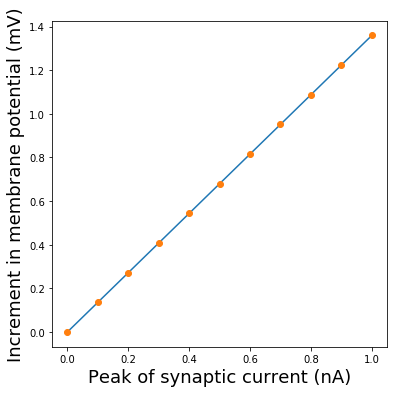

In [40]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(arrayData[0,:].reshape(-1,1), arrayData[1,:])

# Relation between increment in membrane potential and synaptic current
rcParams['figure.figsize'] = 6, 6
plot(arrayData[0,:],arrayData[0,:]*regr.coef_)
plot(arrayData[0,:],arrayData[1,:],'o')
xlabel('Peak of synaptic current (nA)',fontsize=18)
ylabel('Increment in membrane potential (mV)',fontsize=18)

#### Parameter

In [41]:
factorI = regr.coef_
factorI

array([1.35914091])

#### Relation between factors

In [42]:
factorI/factorE

array([2.])